## Extracting Data using web scraping and python libraries.

## Import libraries.

In [2]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1 - Extracting Tesla Stock Data Using yfinance

Etracting Tesla stock data using the yfinance library and display the data to view it closely 

In [3]:
# Define the ticker symbol for Tesla
ticker_symbol = 'TSLA'
# Create a Ticker object for Tesla
tesla_ticker = yf.Ticker(ticker_symbol)
# Fetch the data for Tesla
Tes=yf.download(ticker_symbol)

# Display the first 5 rows 
Tes.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [31]:

# Access the stock information dictionary
stock_info = tesla_ticker.info

# Print the stock information
for k, v in stock_info.items():
    print(f"{k}: {v}")


address1: 1 Tesla Road
city: Austin
state: TX
zip: 78725
country: United States
phone: 512 516 8177
website: https://www.tesla.com
industry: Auto Manufacturers
industryKey: auto-manufacturers
industryDisp: Auto Manufacturers
sector: Consumer Cyclical
sectorKey: consumer-cyclical
sectorDisp: Consumer Cyclical
longBusinessSummary: Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financin

## Question 2 - Extracting Tesla Revenue Data Using Webscraping 

In [10]:


# Define the URL for Tesla's revenue data on Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Define headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}

# Send a request to the Macrotrends page with headers
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables in the page
tables = soup.find_all('table')

# Initialize table_index
table_index = None

# Find the table index containing the word "Revenue"
for index, table in enumerate(tables):
    if "Revenue" in str(table):
        table_index = index
        break  # Stop searching once the table is found

# Ensure the table is found
if table_index is not None:
    # Initialize a list to store revenue data
    revenue_data = []

    # Extract rows from the identified table
    for row in tables[table_index].tbody.find_all("tr"):
        cols = row.find_all("td")
        if cols:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            revenue_data.append({"Date": date, "Revenue": revenue})

    # Create DataFrame from the list
    Tesla_revenue = pd.DataFrame(revenue_data)

    # Display the DataFrame
    print(Tesla_revenue.head(5))

    # Optionally save to CSV
    Tesla_revenue.to_csv('tesla_revenue_data.csv', index=False)
    print("Revenue data saved to 'tesla_revenue_data.csv'")
else:
    print("Failed to find a table containing 'Revenue'.")


   Date Revenue
0  2023   96773
1  2022   81462
2  2021   53823
3  2020   31536
4  2019   24578
Revenue data saved to 'tesla_revenue_data.csv'


## Question 3 - Extracting GameStop Stock Data Using yfinance 

The yfinance library allows me easily to download and view historical market data for GameStop using its ticker symbol (GME).

In [4]:
# Create a Ticker object for GameStop
Gs_ticker ='GME'
GameStop_ticker = yf.Ticker(Gs_ticker)
# Fetch the data for Tesla
gs=yf.download(Gs_ticker)

# Display the first 5 rows of the dataset
gs.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691667,76216000
2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674835,8389600
2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


In [5]:

# Access the stock information dictionary
stock_info = GameStop_ticker.info

# Print the stock information
for key, value in stock_info.items():
    print(f"{key}: {value}")


address1: 625 Westport Parkway
city: Grapevine
state: TX
zip: 76051
country: United States
phone: 817 424 2000
website: https://www.gamestop.com
industry: Specialty Retail
industryKey: specialty-retail
industryDisp: Specialty Retail
sector: Consumer Cyclical
sectorKey: consumer-cyclical
sectorDisp: Consumer Cyclical
longBusinessSummary: GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages in the digital asset wallet and NFT marketplace activities. The compa

## Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [7]:
# Define the URL for GameStop's revenue data on Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Define headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}

# Send a request to the Macrotrends page with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all tables in the page
    tables = soup.find_all('table')

    # Initialize table_index
    table_index = None

    # Find the table index containing the word "Revenue"
    for index, table in enumerate(tables):
        if "Revenue" in str(table):
            table_index = index
            break  

    # Ensure the table is found
    if table_index is not None:
        # Initialize a list to store revenue data
        revenue_data = []

        # Extract rows from the identified table
        for row in tables[table_index].tbody.find_all("tr"):
            cols = row.find_all("td")
            if cols:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                revenue_data.append({"Date": date, "Revenue": revenue})

        # Create DataFrame
        gamestop_revenue = pd.DataFrame(revenue_data)

        # Display the DataFrame
        print("\nRevenue:")
        print(gamestop_revenue)

        # Save to CSV
        gamestop_revenue.to_csv('gamestop_revenue_data.csv', index=False)
        print("Revenue data saved to 'gamestop_revenue_data.csv'")
    else:
        print("Failed to find the 'Revenue' table.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")



Revenue:
    Date Revenue
0   2024    5273
1   2023    5927
2   2022    6011
3   2021    5090
4   2020    6466
5   2019    8285
6   2018    8547
7   2017    7965
8   2016    9364
9   2015    9296
10  2014    9040
11  2013    8887
12  2012    9551
13  2011    9474
14  2010    9078
15  2009    8806
Revenue data saved to 'gamestop_revenue_data.csv'


## Question 5 - Tesla Stock and Revenue Dashboard -

C:\Users\Mahmood\AppData\Local\Temp\ipykernel_68436\2395663042.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Revenue', data=Tesla_revenue, palette='viridis')


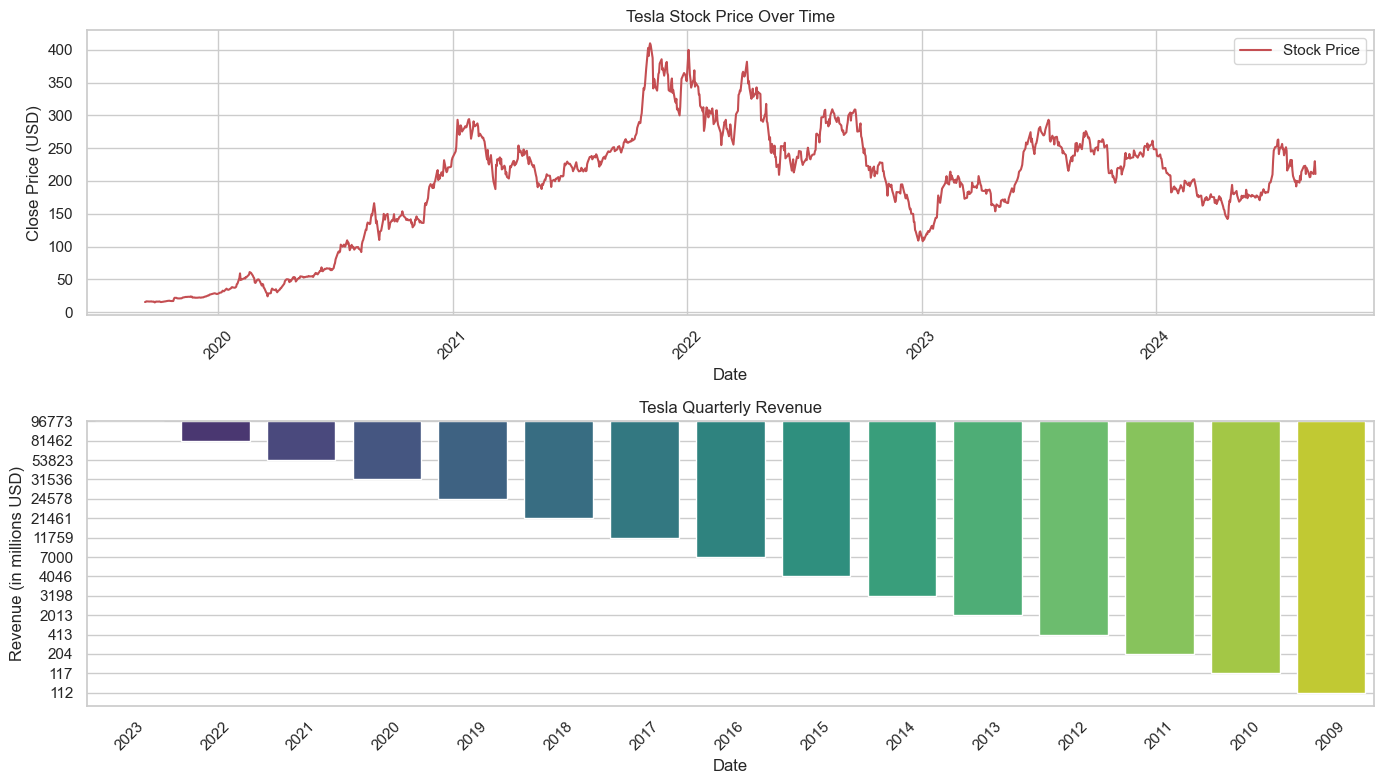

In [29]:
tesla_stock_data = tesla_ticker.history(period="5y")  # Get the last 5 years of data

# Create a figure for the dashboard
plt.figure(figsize=(14, 8))

# Subplot 1: Line chart for Tesla's historical stock price
plt.subplot(2, 1, 1)
sns.lineplot(x='Date', y='Close', data=tesla_stock_data, color='r', label='Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)

# Subplot 2: Bar chart for Tesla's revenue over time
plt.subplot(2, 1, 2)
sns.barplot(x='Date', y='Revenue', data=Tesla_revenue, palette='viridis')
plt.title('Tesla Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions USD)')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the dashboard
plt.show()


 line chart showing Tesla's closing stock price over the past five years.
barplot to visualize Tesla's revenue over time.

## Question 6 - GameStop Stock and Revenue Dashboard-

C:\Users\Mahmood\AppData\Local\Temp\ipykernel_68436\3921940599.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Revenue', data=gamestop_revenue, palette='viridis')


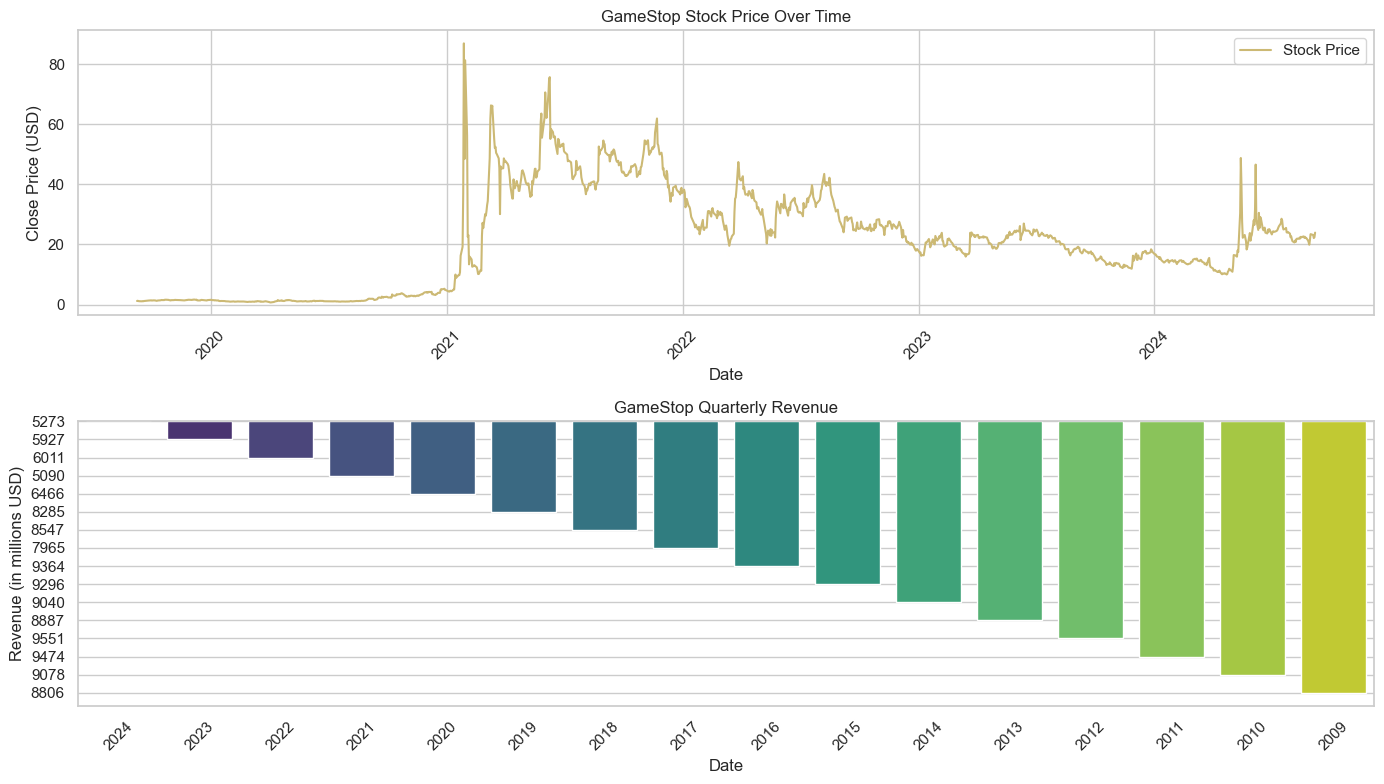

In [34]:
gamestop_stock_data = GameStop_ticker.history(period="5y")  # Get the last 5 years of data
# Create a Charts for the dashboard
plt.figure(figsize=(14, 8))

# Subplot 1: Line chart for GameStop's  stock price
plt.subplot(2, 1, 1)
sns.lineplot(x='Date', y='Close', data=gamestop_stock_data, color='y', label='Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)

# Subplot 2: Bar chart for GameStop's revenues
plt.subplot(2, 1, 2)
sns.barplot(x='Date', y='Revenue', data=gamestop_revenue, palette='viridis')
plt.title('GameStop Quarterly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions USD)')
plt.xticks(rotation=45)


plt.tight_layout()

# Display the dashboard
plt.show()


line chart showing GameStop's closing stock price over the past five years using Seaborn.
bar chart visualizing GameStop's revenue over time using Seaborn